In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.special import factorial

In [2]:
frame_length = 26
number_of_drops = 1e4 # Scientific notation: for example 5e7 = 5*10^7 or 3e-4 = 3*10^-4
max_simulated_users = 25
lambdas = np.arange(0.025,0.26,0.025)
results = np.array([0,0,0,0,0,1,0,1,4,16,57,127,408,1138,2646,5055,7717,9350,9931,10000,10000,10000,10000,10000,10000])

In these simulations we want to estimate a sum
$$
\sum_{u=0}^{\infty} P(\text{"Error with u active users"})e^{-\lambda}\frac{\lambda^u}{u!}
$$
and in the tail, i.e with large $u$, we assume that $P(\text{"Error with u active users"}) = 1$. 
Thus the error term is of form
$$
e^{-\lambda}\sum_{u=k+1}^\infty \frac{\lambda^u}{u!}
$$
The sum is now a tail of the Taylor series for $e^\lambda$. The tail (or error) term in the Taylor approximation is
$$
R_k(\lambda) = \frac{e^\xi}{(k+1)!} \lambda^{k+1}
$$
for some $0 < \xi \leq \lambda$. In order to be safe and maximize the error term, first take a maximal lambda $\lambda_{\text{max}}$ used in simulations and then set $\xi = \lambda_{\text{max}}$.
And thus we get a form
$$
e^{-\lambda_{\text{max}}}R_k(\lambda_{\text{max}}) \leq \frac{\lambda_{\text{max}}^{k+1}}{(k+1)!} 
$$
and the last one to the right is the one we calculate.

In [3]:
largest_lambda = lambdas[-1]*frame_length
error = largest_lambda**(max_simulated_users+1) / factorial(max_simulated_users+1)
print(f'Approximation error for the given range of simulated users: {error}')

Approximation error for the given range of simulated users: 1.2225353454938447e-06


**The approximation error should be less than 1e-5 with a good range of users**

In [4]:
def g(intensities):
    res = np.array([])
    for intensity in intensities:
        res = np.append(res, np.sum(failure_prob*np.exp(-intensity*frame_length)*(intensity*frame_length)**user_range / factorial(user_range)))
    return res

In [5]:
failure_prob = results/number_of_drops
error_probs = np.array([])
user_range = np.arange(1,max_simulated_users + 0.1, 1)
error_probs = g(lambdas)

In [6]:
xpoints = np.linspace(lambdas[0],lambdas[-1],1000)
curve = g(xpoints)

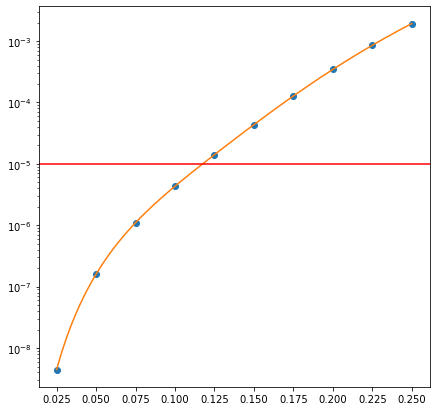

In [7]:
plt.figure(figsize=(7,7))
plt.plot(lambdas, error_probs, 'o')
plt.semilogy(xpoints, curve)
plt.axhline(y = 1e-5, color = 'r', linestyle = '-')
_ = plt.xticks(lambdas) # Disable trash output by assigning it to _